In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.5f}'.format
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#pd.set_option('display.max_rows', 20)

In [ ]:
!pip install openpyxl

In [ ]:
data = pd.read_excel("/kaggle/input/housing-data/housingData_7R.xlsx")

In [ ]:
df = data.copy()

In [ ]:
#data = df.copy()

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.columns

In [ ]:
data = data.drop('Unnamed: 0', axis = 1)

In [ ]:
data.describe(include = "all")

In [ ]:
data['adDescription'].head()

In [ ]:
data['adDealType'].value_counts()

In [ ]:
data['Deal_Type'] = data['adDealType'].copy()

In [ ]:
target_map = {
    10: 'rental',
    20: 'sell'}

data.Deal_Type.replace(target_map, inplace = True)

In [ ]:
data['Deal_Type'].head()

In [ ]:
data.columns

In [ ]:
len(data.columns)

In [ ]:
original_col = data.columns

new_col = ['ID', 'DealType', 'Canton', 'ZipCode',
           'City','PublishedDate', 'AvailableDate', 'PriceText', 
           'Description', 'LangDetected', 'NumRooms', 'Floor', 
           'YearOfConstruction', 'NumApartments', 'Floor1', 
           'NumApartments1', 'LivingSpace', 'BuildingArea', 
           'UsefulArea', 'CoordE', 'CoordN' ,'Deal_Type']

data = data.rename(columns=dict(zip(original_col,new_col)))

data.head()

In [ ]:
# replace all column names (in place)
#new_cols = [‘column_x’, ‘column_y’, ‘column_z’]
#df.columns = new_cols

## EDA

In [ ]:
data.head()

In [ ]:
data.columns

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(data['Deal_Type'])
plt.title('Target variable distribution')
plt.show()

In [ ]:
data.shape

In [ ]:
data.isnull().sum().sort_values(ascending = False)

In [ ]:
#Plot missing values in data
ax = data.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column Dataset', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percentage = ((data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100)
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head(20)

## Treating Missing Values and Outliers

In [ ]:
data.isnull().sum().sort_values(ascending=False)

In [ ]:
mis_columns = ['NumApartments', 'NumApartments1', 'BuildingArea', 'UsefulArea' ]

In [ ]:
data.corr()

In [ ]:
data['NumApartments'].head()

In [ ]:
data['NumApartments'].value_counts()

In [ ]:
mis_columns

In [ ]:
NumApartments = data['NumApartments'].copy()
BuildingArea = data['BuildingArea'].copy()
UsefulArea = data['UsefulArea'].copy()

In [ ]:
data.columns

In [ ]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

#sample_outliers = detect_outliers_zscore(data['adNumApartments.1'])
#print("Outliers from Z-scores method: ", sample_outliers)

In [ ]:
sns.boxplot(data['NumApartments'])
plt.show()

In [ ]:
sns.distplot(data['NumApartments'])
plt.show()

In [ ]:
data = data.drop(columns = mis_columns, axis = 1)

In [ ]:
data.columns

In [ ]:
data.isnull().sum().any()

In [ ]:
data.isnull().sum().sort_values(ascending = False)

In [ ]:
data['City'].value_counts()

In [ ]:
City = data['City'].copy()

In [ ]:
data['City'].describe()

In [ ]:
data['City'].head()

In [ ]:
#Filling Null Values
data['City'].fillna(data['City'].mode(), inplace = True) #Fillna
#data['City'].ffill(axis = 0)  #ForwardFill

In [ ]:
data.isnull().sum().sort_values(ascending = False)

In [ ]:
# ptype_encode = {}
# ptype_encode_values = range(16,0,-1)
# for i,k in zip(type_count.index,ptype_encode_values):
#     ptype_encode[i]=k
# ptype_encode

# data['adCity'] = data['adCity'].map(ptype_encode)

#### **Exploring the City copied from data['City']**

In [ ]:
City.head()

In [ ]:
City = pd.DataFrame(data = City)
City.head()

In [ ]:
City.info()

In [ ]:
encoder=ce.TargetEncoder(cols='City')

In [ ]:
data['City'].head()

In [ ]:
data['City'].head(20)

In [ ]:
data['City'].describe()

In [ ]:
data.describe(include = 'all')

In [ ]:
#sns.scatterplot(x = data['City'], y = data['PriceText'])
#plt.show()

## Exploring the target Column

In [ ]:
PriceText = data['PriceText'].copy()
PriceText = pd.DataFrame(data = PriceText)
PriceText.head()

In [ ]:
data['PriceText'].head()

In [ ]:
data['PriceText'] = data['PriceText'].replace(',','', regex = True)
data['PriceText'].head()

In [ ]:
data['PriceText'] = data['PriceText'].replace('CHF','', regex = True)
data['PriceText'].head()

In [ ]:
data['PriceText'].describe()

In [ ]:
data['PriceText'].isnull().sum()

In [ ]:
data['PriceText'].value_counts()

In [ ]:
data['PriceText'] = data['PriceText'].replace('On request',np.nan)
data['PriceText'].value_counts()

In [ ]:
data['PriceText'].isnull().sum()

In [ ]:
ax = data.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column Dataset', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [ ]:
data['PriceText'] = data['PriceText'].replace('CHF','', regex = True)
data['PriceText'].head()

In [ ]:
data['PriceText'].value_counts()

In [ ]:
data['PriceText'] = data['PriceText'].replace('EUR','', regex = True)
data['PriceText'].head()

In [ ]:
data['PriceText'].dtype

In [ ]:
data['PriceText'].value_counts()

In [ ]:
data['PriceText'] = data['PriceText'].apply(pd.to_numeric)

In [ ]:
data['PriceText'].dtype

In [ ]:
data['PriceText'].describe()

In [ ]:
sns.distplot(data['PriceText'])

In [ ]:
sns.boxplot(data['PriceText'])

In [ ]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

In [ ]:
sample_outliers = detect_outliers_zscore(data['PriceText'])
print("Outliers from Z-scores method: ", sample_outliers)

Since, PriceText contains outliers, drop the rows

In [ ]:
data = data[data["PriceText"]<min(sample_outliers)].reset_index(drop = True)

In [101]:
data['PriceText'].describe()

count     555209.00000
mean      324747.62023
std       816841.63997
min            1.00000
25%         1200.00000
50%         1800.00000
75%       300000.00000
max     12923475.00000
Name: PriceText, dtype: float64

In [ ]:
sns.distplot(data['PriceText'])

In [ ]:
sample_outliers = detect_outliers_zscore(data['PriceText'])
print("Outliers from Z-scores method: ", sample_outliers)

In [ ]:
data = data[data["PriceText"]<min(sample_outliers)].reset_index(drop = True)

<AxesSubplot:xlabel='PriceText'>

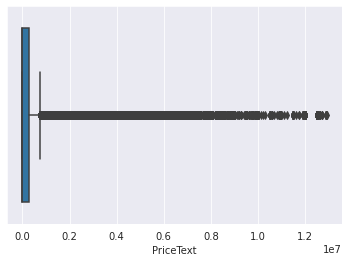

In [104]:
sns.boxplot(data['PriceText'])

Text(0.5, 0, 'Sample')

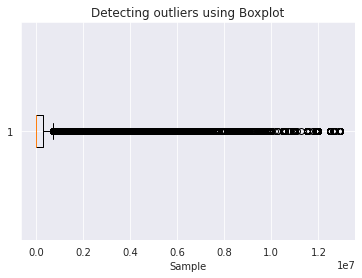

In [102]:
plt.boxplot(data["PriceText"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

In [ ]:
#data['adUsefulArea'] = data['adUsefulArea'].astype('float64')
#data['adUsefulArea'] = data['adUsefulArea'].apply(pd.to_numeric)
#df[c] = df[c].apply(pd.to_numeric,errors='coerce')

In [ ]:
data.columns

In [ ]:
data.columns

## Things to try out

* **data = data.sort_values(by=['adPublishedDate']).reset_index(drop=True)**
* Trying to sort the data by dates... 'adPublishedDate', 'adAvailableDate'
* How many days is between the published date and available date
* Extract days and month from the date columns

In [ ]:
#Remember this for some visualization
count_plot = sns.catplot(x="adNumApartments.1", kind="count" ,data=data, hue="DealType")
#plt.hist(data['adNumApartments.1'])
plt.show()